# Combine DIC data with X-ray in order to calculate multiaxial flow curve

- Use pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Dependents

In [2]:
import os
from glob import glob
from RS import analyze_proto
import matplotlib as mpl
import time
from MP import progress_bar, lib
mpl_lib=lib.mpl_lib
uet=progress_bar.update_elapsed_time
GS=mpl.gridspec.GridSpec

- Name of DIC files

In [4]:
date='20120723'
path='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/'
fn_DIC=os.path.join(path,date,'DIC/DIC_results.txt')
dic_dat=np.loadtxt(fn_DIC,skiprows=1).T

# Read lab note book in order to match Xray file and DIC index

In [5]:
print os.popen('ls -ls %s'%os.path.join(path,date,'Xray')).read()

total 800
8 -rw-------  1 yj  admin  1446 Mar 30 15:36 23JUL12_0001Data.txt
8 -rw-------  1 yj  admin  2984 Mar 30 15:36 23JUL12_0001Data1Phi-90.txt
8 -rw-------  1 yj  admin  2982 Mar 30 15:36 23JUL12_0001Data2Phi0.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:36 23JUL12_0001Data3Phi45.txt
8 -rw-------  1 yj  admin  2984 Mar 30 15:35 23JUL12_0001Data4Phi135.txt
8 -rw-------  1 yj  admin  1448 Mar 30 15:35 23JUL12_0003Data.txt
8 -rw-------  1 yj  admin  2984 Mar 30 15:35 23JUL12_0003Data1Phi-90.txt
8 -rw-------  1 yj  admin  2982 Mar 30 15:35 23JUL12_0003Data2Phi0.txt
8 -rw-------  1 yj  admin  2982 Mar 30 15:35 23JUL12_0003Data3Phi45.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:35 23JUL12_0003Data4Phi135.txt
8 -rw-------  1 yj  admin  1449 Mar 30 15:35 23JUL12_0005Data.txt
8 -rw-------  1 yj  admin  2985 Mar 30 15:35 23JUL12_0005Data1Phi-90.txt
8 -rw-------  1 yj  admin  2981 Mar 30 15:35 23JUL12_0005Data2Phi0.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:35 23JUL12_0005Data3Phi45.tx

- Making a fref file for Proto data analysis

In [9]:
# ------------------------------------------------------------------------
# Find suitable experimental stress factor file
fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/YJ_BB_10times.sff'
# fn_sff='/Users/yj/GoogleDrive/expdat/Marciniak-X-ray-IF/YJ_BB_10times.sff'


# ------------------------------------------------------------------------
# Refer to Laboratory notebook to match up the X-ray data filename 
# and DIC image number
DIC_XRD="""#5  23JUL12_0006.tr
#6   23JUL12_0006.tr
#73  23JUL12_0007.tr
#74  23JUL12_0007.tr
#95  23JUL12_0008.tr
#96  23JUL12_0008.tr
#114 23JUL12_0009.tr
#115 23JUL12_0009.tr
#130 23JUL12_0010.tr
#131 23JUL12_0010.tr
#145 23JUL12_0011.tr
#146 23JUL12_0011.tr
#159 23JUL12_0012.tr
#160 23JUL12_0012.tr
#172 23JUL12_0013.tr
#173 23JUL12_0013.tr
#184 23JUL12_0014.tr
#185 23JUL12_0014.tr
#196 23JUL12_0015.tr
#197 23JUL12_0015.tr
#207 23JUL12_0016.tr
#208 23JUL12_0016.tr
#217 23JUL12_0017.tr
#218 23JUL12_0017.tr
#227 23JUL12_0018.tr
#228 23JUL12_0018.tr
#238 23JUL12_0019.tr
#239 23JUL12_0019.tr
#247 23JUL12_0020.tr
#248 23JUL12_0020.tr
#257 23JUL12_0021.tr"""

# ------------------------------------------------------------------------

fn_fref=fn_DIC.split('DIC')[0]+'f_fref.txt'
f_fref=open(fn_fref,'w')

f_fref.write(fn_sff)
f_fref.write('  MajorStrainColumn: 2\n')
f_fref.write('%14s %12s %12s %12s %12s %5s\n'%('filename','Exx','Eyy','Exy','Ezz','DIC'))
lines=DIC_XRD.split('\n')
inds = []; fns = []
for line in lines:
    ind,fn=line.split()
    ind=int(ind.split('#')[-1])
    fn = fn.split('.tr')[0]
    inds.append(ind); fns.append(fn)
    
    col = dic_dat[0]
    ix=np.where(col==ind)[0]
    i = int(col[ix][0]) ## dic index
    # print ix,i

    exx = dic_dat[5][ix]
    eyy = dic_dat[7][ix]
    exy = dic_dat[9][ix]
    ezz = -exx-eyy    
    f_fref.write(('%14s '+'%+11.5e '*4+'%5i \n')%(fn, exx, eyy, exy, ezz,i))


f_fref.close()
print '-----------------------------------------------------------------------------------------------------'
print fn_fref, 'has been created:\n Use it for further stress analysis'
print '-----------------------------------------------------------------------------------------------------'

-----------------------------------------------------------------------------------------------------
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120723/f_fref.txt has been created:
 Use it for further stress analysis
-----------------------------------------------------------------------------------------------------


In [10]:
print os.popen('cat %s'%os.path.join(path,date,'f_fref.txt')).read()

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/YJ_BB_10times.sff  MajorStrainColumn: 2
      filename          Exx          Eyy          Exy          Ezz   DIC
  23JUL12_0006 +4.49093e-04 +1.66450e-04 -8.40580e-05 -6.15543e-04     5 
  23JUL12_0006 +4.56908e-04 +1.52042e-04 -3.48485e-05 -6.08950e-04     6 
  23JUL12_0007 +7.72097e-03 +7.05011e-03 +3.62222e-05 -1.47711e-02    73 
  23JUL12_0007 +7.75133e-03 +7.00051e-03 -6.27964e-05 -1.47518e-02    74 
  23JUL12_0008 +1.40819e-02 +1.34003e-02 -1.30738e-04 -2.74822e-02    95 
  23JUL12_0008 +1.38960e-02 +1.33526e-02 +1.23826e-05 -2.72486e-02    96 
  23JUL12_0009 +2.07105e-02 +1.97623e-02 +4.83531e-06 -4.04728e-02   114 
  23JUL12_0009 +2.06086e-02 +1.98074e-02 +6.03670e-05 -4.04160e-02   115 
  23JUL12_0010 +2.70324e-02 +2.61359e-02 +1.02968e-05 -5.31683e-02   130 
  23JUL12_0010 +2.70675e-02 +2.61542e-02 +3.03520e-05 -5.32217e-02   131 
  23JUL12_0011 +3.34216e-02 +3.23178e-02 +2.36974e-05 -6.57394e-02   145 
  23JUL12_0011 +3.3

+ Running analyze_proto.main for the X-ray and DIC experiments to calculate
  stress/strain

In [11]:
## plastic strain of the points where the X-ray d-spacing
## were meausured are important information that is utilized over the X ray analysis.
## If, fc or fn_str are not given, the below application
## bases on the strain given in the fref file -
## the two major strain components are used with assumption
## that the sample was in 'equi-biaxial' strain.

t0=time.time()
RS=analyze_proto.main(path=os.path.join(path,date,'Xray'),
                   fn_sf=fn_sff,fref=os.path.join(path,date,'f_fref.txt'),
                   ind_plot=True)
uet(time.time()-t0)

---------------------------------------------
Strain information where SF/IG were measured
requires either fc or fn_str specified
If not the strain column in fn_sf is used,
subsequent analysis is performed by assuming
that the sample is in equibiaxial strain
---------------------------------------------


#-----------------------------------------------------#
 Interpolate SF and IG for matching with D-spacings
epsilon_vm:
[ 0.00063681  0.00063388  0.01477616  0.01475821  0.02748502  0.02725041
  0.0404765   0.04041865  0.05317082  0.05322431  0.06574249  0.06545003
  0.07750439  0.07765717  0.08939593  0.08939341  0.10074448  0.10066481
  0.11172133  0.11201048  0.12268542  0.12272798  0.13318418  0.13326477
  0.1434053   0.14378718  0.15357654  0.15379291  0.16325074  0.16296345
  0.17268856]
Strain reference at which sf was measured:
[ 0.    0.02  0.2   0.5   0.7 ]
  ** Phi angles of SF are different **
  ** Phi angles of IG are different **
#----------------------------------------

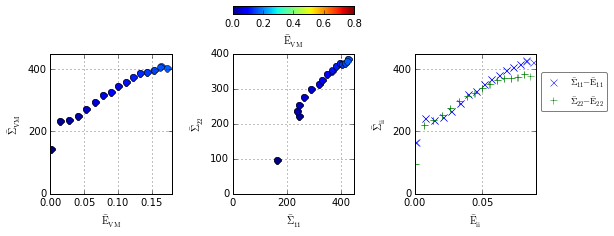

In [12]:
""" 
RS.EXP.flow.epsilon, RS.flow.sigma
"""
mn=0;mx=0.8
norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)

fx=9
fy=fx*0.35
fig=plt.figure(figsize=(fx,fy))
gs=GS(20,3,wspace=0.5)
ax1=fig.add_subplot(gs[5:,0])
ax2=fig.add_subplot(gs[5:,1])
ax3=fig.add_subplot(gs[5:,2])

nstp = RS.EXP.flow.nstp


for istp in xrange(nstp):
    c=m.to_rgba(RS.EXP.flow.epsilon_vm[istp])
    ax2.plot(RS.flow.sigma[0,0][istp],RS.flow.sigma[1,1][istp],
             'o',mec='k',mfc=c)
    ax1.plot(RS.EXP.flow.epsilon_vm[istp],RS.flow.sigma_vm[istp],'o',c=c)
# ax2.plot(RS.flow.sigma[0,0],RS.flow.sigma[1,1],'k--')

ax3.plot(RS.EXP.flow.epsilon[0,0],RS.flow.sigma[0,0],'x',label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}_{11}}$')
ax3.plot(RS.EXP.flow.epsilon[1,1],RS.flow.sigma[1,1],'+',label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}_{22}}$')


for ax in fig.axes:
    ax.set_ylim(0.,);ax.set_xlim(0.,)
    ax.locator_params(nbins=4)
    ax.grid()

ax2.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$')
ax2.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$')
ax3.set_xlabel(r'$\mathrm{\bar{E}_{ii}}$')
ax3.set_ylabel(r'$\mathrm{\bar{\Sigma}_{ii}}$')
ax1.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
ax1.set_ylabel(r'$\mathrm{\bar{\Sigma}_{VM}}$')
ax3.legend(loc='best',fontsize=9,numpoints=1,bbox_to_anchor=(1,0.9))


axcb=fig.add_subplot(gs[0,1])
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,orientation='horizontal',
                          norm=norm,filled=True,format='%3.1f')
# axcb.locator_params(nbins=4)
axcb.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
cb.set_ticks(np.linspace(mn,mx,5))
#mpl_lib.add_cb(ax=axcb,cmap=cmap, filled=True,
#               format='%5.3f',norm=norm,
#               ylab=r'$\mathrm{\bar{E}_{VM}}$')



In [14]:
import cPickle as pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

fn = os.path.join(path,date,'RS.pck')
print fn
save_object(obj=RS, filename=fn)

fn = os.path.join('../../../pickles/RS_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=RS, filename=fn)

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120723/RS.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/BB/../../../pickles/RS_20120723.pck
